In [1]:
import tensorflow as tf

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [6]:
df=pd.read_csv('diamonds.csv')

In [7]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.shape

(53940, 11)

In [9]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [11]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [14]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
s = df['carat']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [16]:
print(len(outliers))

1889


In [17]:
a=list(outliers.keys())

In [18]:
df.drop(a,inplace=True)

In [19]:
s = df['depth']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers1 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [20]:
print(len(outliers1))

2796


In [21]:
b=list(outliers1.keys())

In [22]:
df.drop(b,inplace=True)

In [23]:
s = df['table']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers2 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [24]:
print(len(outliers2))

342


In [25]:
c=list(outliers2.keys())

In [26]:
df.drop(c,inplace=True)

In [27]:
s = df['x']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers3 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [28]:
print(len(outliers3))

6


In [29]:
d=list(outliers3.keys())

In [30]:
df.drop(d,inplace=True)

In [31]:
s = df['y']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers4 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [32]:
print(len(outliers4))

1


In [33]:
e=list(outliers4.keys())

In [34]:
df.drop(e,inplace=True)

In [35]:
s = df['z']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers5 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [36]:
print(len(outliers5))

8


In [37]:
f=list(outliers5.keys())

In [38]:
df.drop(f,inplace=True)

In [39]:
df.shape

(48898, 10)

In [40]:
df_cat=df.select_dtypes(object)

In [41]:
df_num=df.select_dtypes(['int64','float64'])

In [42]:
df_num.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48


In [43]:
df_cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
3,Premium,I,VS2
4,Good,J,SI2
5,Very Good,J,VVS2


In [44]:
df_cat['cut'].value_counts()

Ideal        21035
Premium      12521
Very Good    11262
Good          3807
Fair           273
Name: cut, dtype: int64

In [45]:
df_cat['color'].value_counts()

G    10516
E     9107
F     8780
H     7360
D     6339
I     4552
J     2244
Name: color, dtype: int64

In [46]:
df_cat['clarity'].value_counts()

SI1     11766
VS2     11414
VS1      7701
SI2      7392
VVS2     4863
VVS1     3555
IF       1741
I1        466
Name: clarity, dtype: int64

In [47]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [48]:
df_cat.head()

,cut,color,clarity
0,2,1,3
1,3,1,2
3,3,5,5
4,1,6,3
5,4,6,7


In [49]:
df_new=pd.concat([df_cat,df_num],axis=1)

In [50]:
df_new.head()

,cut,color,clarity,carat,depth,table,price,x,y,z
0,2,1,3,0.23,61.5,55.0,326,3.95,3.98,2.43
1,3,1,2,0.21,59.8,61.0,326,3.89,3.84,2.31
3,3,5,5,0.29,62.4,58.0,334,4.20,4.23,2.63
4,1,6,3,0.31,63.3,58.0,335,4.34,4.35,2.75
5,4,6,7,0.24,62.8,57.0,336,3.94,3.96,2.48


In [51]:
X=df_new.drop('price',axis=1)
Y=df_new['price']

In [52]:
X.head()

,cut,color,clarity,carat,depth,table,x,y,z
0,2,1,3,0.23,61.5,55.0,3.95,3.98,2.43
1,3,1,2,0.21,59.8,61.0,3.89,3.84,2.31
3,3,5,5,0.29,62.4,58.0,4.20,4.23,2.63
4,1,6,3,0.31,63.3,58.0,4.34,4.35,2.75
5,4,6,7,0.24,62.8,57.0,3.94,3.96,2.48


In [53]:
Y.head()

0    326
1    326
3    334
4    335
5    336
Name: price, dtype: int64

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [55]:
ss=StandardScaler()

In [56]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [57]:
model=tf.keras.Sequential([
      tf.keras.layers.Dense(2,activation='relu',input_shape=(X.shape[1],)),
      tf.keras.layers.Dense(3,activation='relu'),
      tf.keras.layers.Dense(1)
])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer='sgd',loss='mse')

In [60]:
trained_model=model.fit(X_train_ss,Y_train,epochs=30,batch_size=100)

Epoch 1/30
343/343 [==============================] - 1s 3ms/step - loss: 12833284.0000
Epoch 2/30
343/343 [==============================] - 1s 3ms/step - loss: 11904874.0000
Epoch 3/30
343/343 [==============================] - 1s 3ms/step - loss: 11904257.0000
Epoch 4/30
343/343 [==============================] - 1s 3ms/step - loss: 11905151.0000
Epoch 5/30
343/343 [==============================] - 1s 3ms/step - loss: 11904107.0000
Epoch 6/30
343/343 [==============================] - 1s 3ms/step - loss: 11904418.0000
Epoch 7/30
343/343 [==============================] - 1s 3ms/step - loss: 11904622.0000
Epoch 8/30
343/343 [==============================] - 1s 2ms/step - loss: 11904325.0000
Epoch 9/30
343/343 [==============================] - 1s 2ms/step - loss: 11904575.0000
Epoch 10/30
343/343 [==============================] - 1s 2ms/step - loss: 11904553.0000
Epoch 11/30
343/343 [==============================] - 1s 3ms/step - loss: 11904940.0000
Epoch 12/30
343/343 [=========

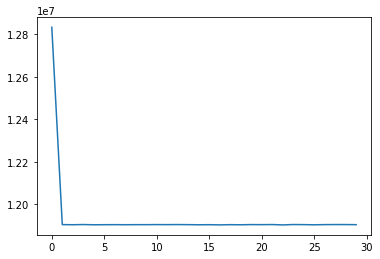

In [61]:
plt.plot(trained_model.history['loss'])

In [62]:
Y_pred=model.predict(X_test_ss)

In [63]:
print(r2_score(Y_test,Y_pred))

-0.0001610224756478651
